In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pearsonr



Loding dataset

In [2]:
data = pd.read_csv("general_data.csv")

In [3]:
data.columns
#Dropping few useless Column out of it

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.drop(["EmployeeCount","EmployeeID","Over18","StandardHours"],inplace = True , axis = 1)

In [5]:
# Drop the few useless column of it and deleted the code
# We divide data into parts such as numerical data and categorical data
categorical = ['Attrition', 'BusinessTravel', 'Department','Education', 'EducationField', 'Gender',"JobLevel",'JobRole','MaritalStatus']
numerical =[]
for i in data.columns:
    if i not in categorical:
        numerical.append(i)
print(categorical,"\n")

print(numerical)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus'] 

['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [6]:
# Dropping all the Nan Value
data.dropna(inplace=True)
data.drop_duplicates(inplace=True) # Dropping ALl Duplicates Value!

In [7]:
# Watching the Outlier in the Dataset

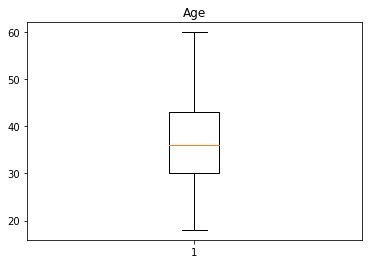

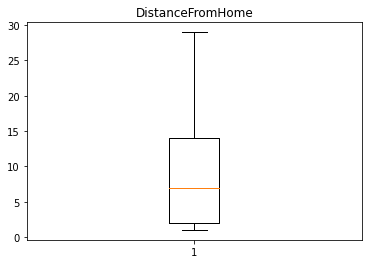

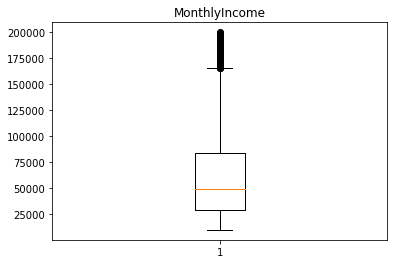

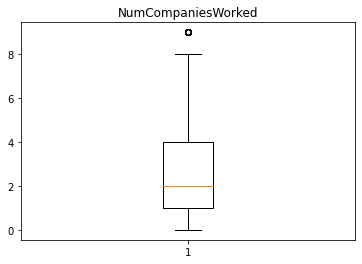

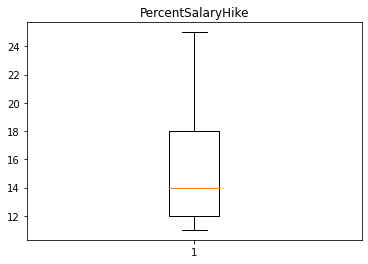

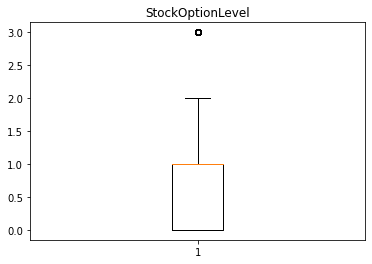

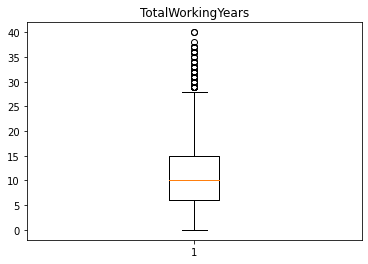

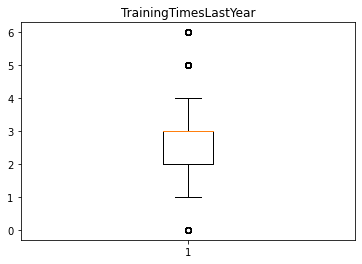

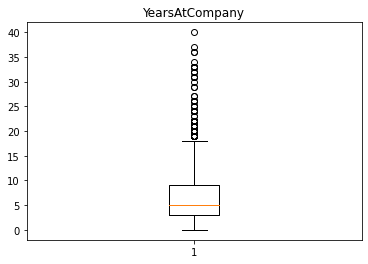

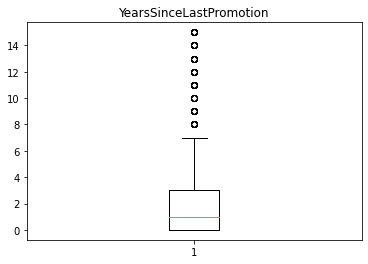

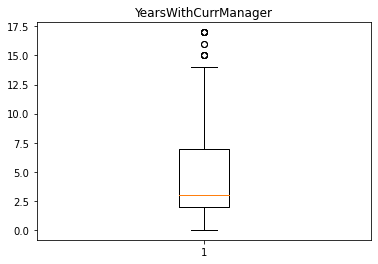

In [8]:
def outlier(num,data):
    for i in num:
        plt.title(i)
        plt.boxplot(data[i])
        plt.show()
outlier(numerical,data)
    


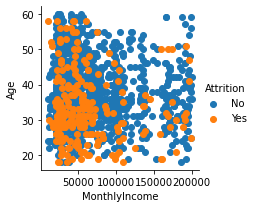

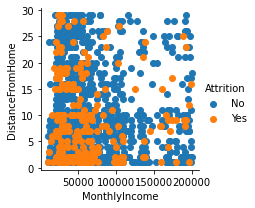

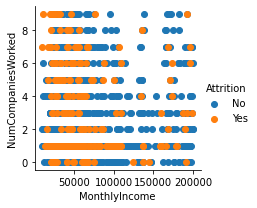

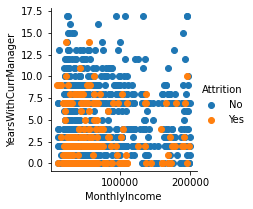

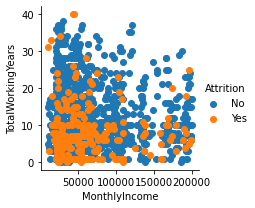

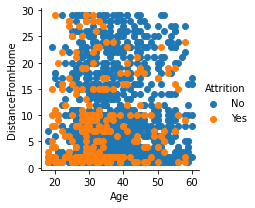

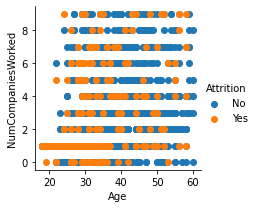

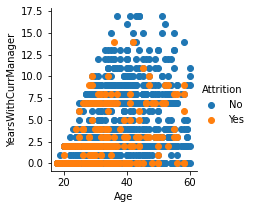

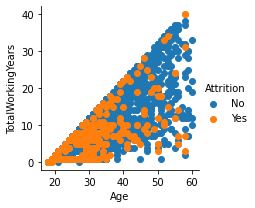

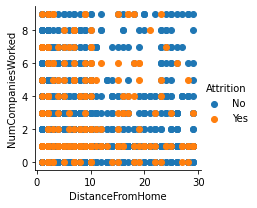

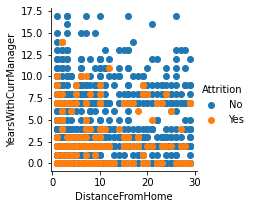

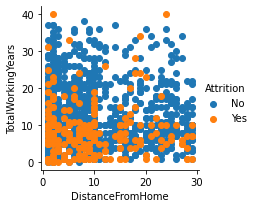

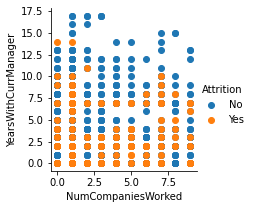

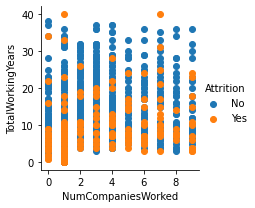

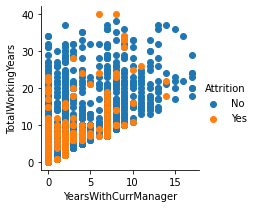

In [9]:
# Combination of all numerical data for Scatter plot
scatterdata = ["MonthlyIncome","Age","DistanceFromHome","NumCompaniesWorked", 'YearsWithCurrManager' , 'TotalWorkingYears']
from itertools import combinations
comb = combinations(scatterdata , 2)
def scatter(num):
    for i in num :
        sns.FacetGrid(data,hue="Attrition")\
        .map(plt.scatter , i[0] , i[1]) \
        .add_legend()
scatter(comb)


### Points to be noted:

### 1)We can see that the higher "age group and higher income people" are "not leaving the company soon"!

### 2)we can even notice that "below the monthlyincome of 75000" and any age group are "leaving the company"

### 3)Employee with ""> than 10 years with current manager arent leaving" the company where as ""<5 years has high rate"

### 4)"Total working Year > 20 less chance" &"< 20 higher chance"


In [10]:
# Working with the % data to exactly know which category people are leaving the company 
#Dividing data into attrition and non attrited data
att = data[data["Attrition"] == "Yes"]
non = data[data["Attrition"] == "No"]

In [11]:
def features(cate):
    for i in cate:
        print(i.title())
        
        print("For attrtion Data \n")
        print(att[i].value_counts(),"\n")
        
         
        
        print("%%%%%% Percentaage Count %%%%%%")
        index = list(att[i].value_counts().index)
        values = list(att[i].value_counts())
        totalvalues = list(data[i].value_counts())
        allvalue = {}
        
        print("The percentage count of att and complete data is \n")
        
        for j in range(len(values)):
            print("For attrited Data")
            print("This unique value is for ",index[j],"in",i)
            d1 = (values[j]/totalvalues[j]) * 100
            print(d1)
            allvalue[index[j]] = d1
        print("***********************************")
        print(max(allvalue, key=allvalue.get))
        print("***********************************")

In [12]:
features(["Department","BusinessTravel","Education","EducationField","Gender","JobLevel","JobRole","MaritalStatus","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"])

Department
For attrtion Data 

Research & Development    151
Sales                      67
Human Resources            19
Name: Department, dtype: int64 

%%%%%% Percentaage Count %%%%%%
The percentage count of att and complete data is 

For attrited Data
This unique value is for  Research & Development in Department
15.71279916753382
For attrited Data
This unique value is for  Sales in Department
15.022421524663676
For attrited Data
This unique value is for  Human Resources in Department
30.158730158730158
***********************************
Human Resources
***********************************
Businesstravel
For attrtion Data 

Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64 

%%%%%% Percentaage Count %%%%%%
The percentage count of att and complete data is 

For attrited Data
This unique value is for  Travel_Rarely in BusinessTravel
14.956855225311601
For attrited Data
This unique value is for  Travel_Frequently in BusinessTr

This unique value is for  3 in YearsWithCurrManager
13.380281690140844
For attrited Data
This unique value is for  4 in YearsWithCurrManager
10.2803738317757
For attrited Data
This unique value is for  1 in YearsWithCurrManager
11.224489795918368
For attrited Data
This unique value is for  8 in YearsWithCurrManager
13.157894736842104
For attrited Data
This unique value is for  9 in YearsWithCurrManager
9.375
For attrited Data
This unique value is for  6 in YearsWithCurrManager
12.903225806451612
For attrited Data
This unique value is for  5 in YearsWithCurrManager
13.793103448275861
For attrited Data
This unique value is for  10 in YearsWithCurrManager
11.11111111111111
For attrited Data
This unique value is for  14 in YearsWithCurrManager
9.090909090909092
For attrited Data
This unique value is for  11 in YearsWithCurrManager
5.555555555555555
***********************************
0
***********************************


In [13]:
# We Saw this Using the % value, Count value Observation can be different from this!

In [14]:
#Lets now look at once the spread of the data


In [15]:
att.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,9.012658,2.877637,2.037975,61682.616034,2.940928,15.481013,0.780591,8.244726,2.654008,5.130802,1.945148,2.852321
std,9.689350,7.783338,1.015664,1.058977,44855.288711,2.678519,3.780618,0.860111,7.169204,1.156464,5.949984,3.153077,3.143349
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2.000000,2.000000,1.000000,28440.000000,1.000000,12.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000
50%,32.000000,7.000000,3.000000,2.000000,49080.000000,1.000000,14.000000,1.000000,7.000000,3.000000,3.000000,1.000000,2.000000
75%,39.000000,15.000000,4.000000,2.000000,71040.000000,5.000000,18.000000,1.000000,10.000000,3.000000,7.000000,2.000000,5.000000
max,58.000000,29.000000,5.000000,5.000000,198590.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,14.000000


In [16]:
non.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,9.227088,2.919708,2.068938,65672.595296,2.64558,15.157340,0.796431,11.862936,2.827251,7.369019,2.234388,4.367397
std,8.888360,8.170187,1.026061,1.116269,47485.656660,2.46009,3.635534,0.850852,7.760719,1.311848,6.096298,3.234762,3.594116
min,18.000000,1.000000,1.000000,1.000000,10510.000000,0.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2.000000,2.000000,1.000000,29360.000000,1.00000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49300.000000,2.00000,14.000000,1.000000,10.000000,3.000000,6.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,86060.000000,4.00000,18.000000,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.00000,25.000000,3.000000,38.000000,6.000000,37.000000,15.000000,17.000000


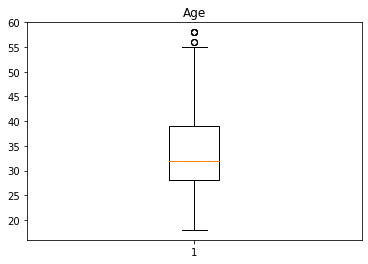

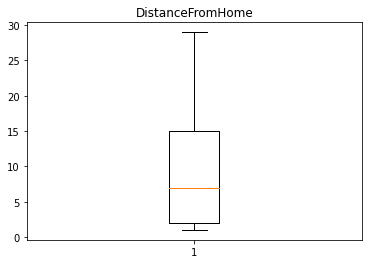

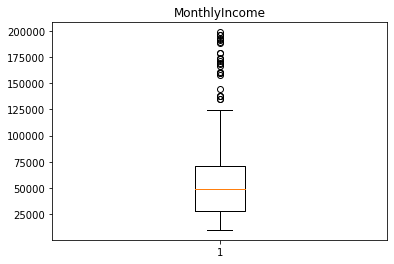

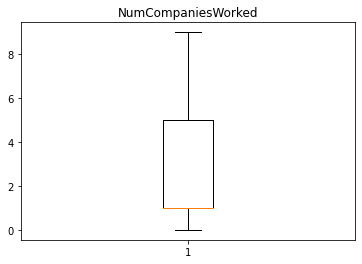

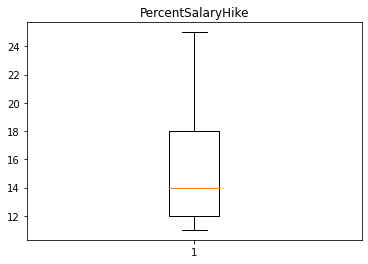

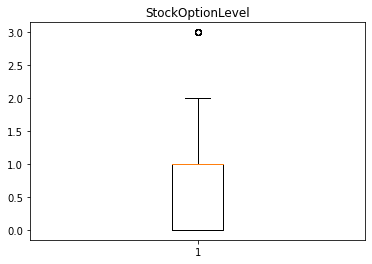

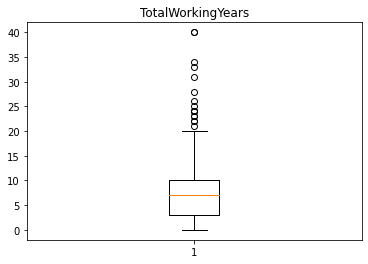

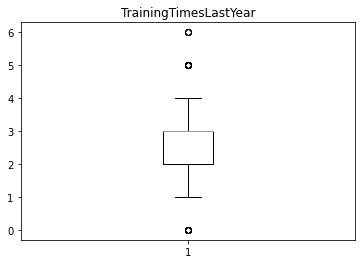

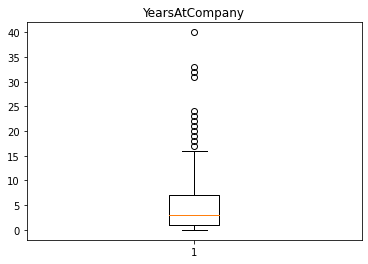

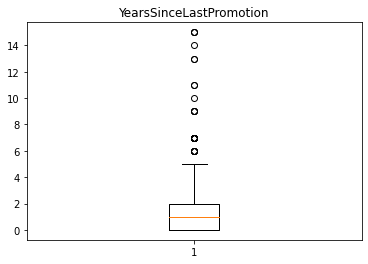

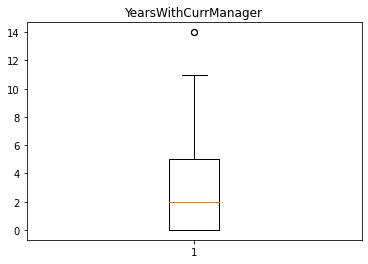

In [17]:
outlier(numerical,att)

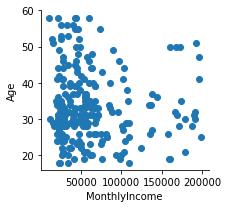

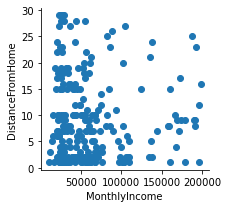

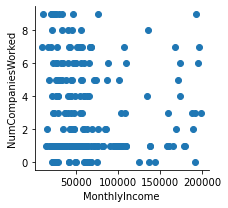

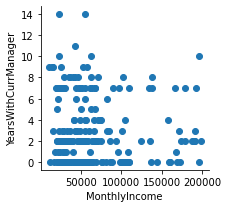

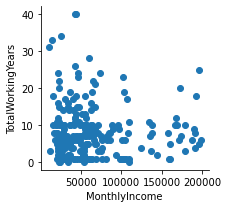

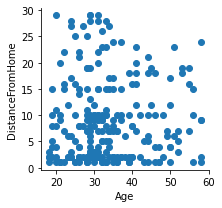

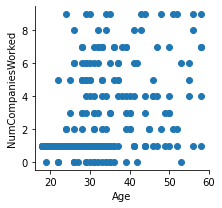

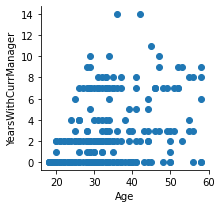

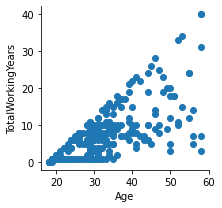

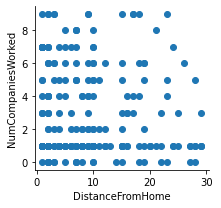

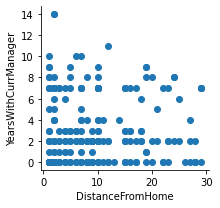

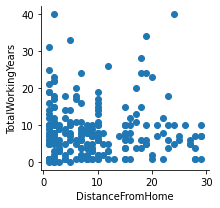

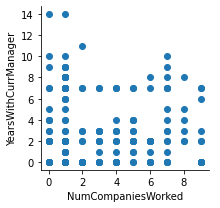

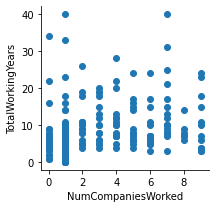

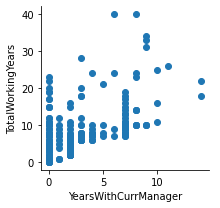

In [18]:
# Combination of all numerical data for Scatter plot
scatterdata = ["MonthlyIncome","Age","DistanceFromHome","NumCompaniesWorked", 'YearsWithCurrManager' , 'TotalWorkingYears']
from itertools import combinations
comb = combinations(scatterdata , 2)
def scatter(num):
    for i in num :
        sns.FacetGrid(att)\
        .map(plt.scatter , i[0] , i[1]) \
        .add_legend()
scatter(comb)

In [19]:
# Now we check the Skewness of attrition data
def skewness(num,att):
    for i in num:
        print(i)
        if att[i].mean() > att[i].median():
            print("positively Skewed starting value are much more for attrition")
            print("*************************************************************")
        else:
            print("Negatively Skewed ending value are much more for attrition")
            print("*************************************************************")
            
skewness(numerical,att)

Age
positively Skewed starting value are much more for attrition
*************************************************************
DistanceFromHome
positively Skewed starting value are much more for attrition
*************************************************************
MonthlyIncome
positively Skewed starting value are much more for attrition
*************************************************************
NumCompaniesWorked
positively Skewed starting value are much more for attrition
*************************************************************
PercentSalaryHike
positively Skewed starting value are much more for attrition
*************************************************************
StockOptionLevel
Negatively Skewed ending value are much more for attrition
*************************************************************
TotalWorkingYears
positively Skewed starting value are much more for attrition
*************************************************************
TrainingTimesLastYear
Negatively S

In [20]:
att["TrainingTimesLastYear"].value_counts()

2    94
3    86
5    17
4    16
1    10
0    10
6     4
Name: TrainingTimesLastYear, dtype: int64

(array([10., 10.,  0., 94.,  0., 86., 16.,  0., 17.,  4.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

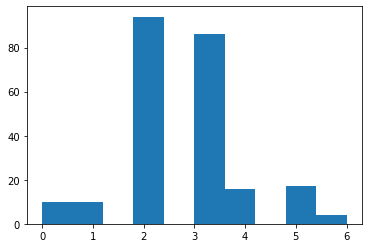

In [21]:
plt.hist(att["TrainingTimesLastYear"])

### So Finally we can conclude that this are the following reason for the attrition among the employee
### So we came out with certain condition out of features which possibily could be the reason for the attrition in the company
### Department - Human Resources
### Business travel : Travel Frequently
### Education : College
### Education Field : Other
### Gender : Male
### JobLevel : 2
### JobRole :Research Scientist
### MaritalStatus : Married
### NumCompaniesWorked : 5
### TotalWorkingYears : 2
### YearsAtCompany : 40
### YearsSinceLastPromotion : 7
### YearsWithCurrentManager : 0
### Age Group : 33-Mean range(26,33)
### DistanceFromHome -1,2Km
### "TrainingTimesLastYear" = 2,3

att & Non are the attrited data and non attrited value!

# Inferential Statistics

In [22]:
# We are sampling the value using unifrom distribution method

In [23]:
att_final = att.sample(n=30)
non_final = non.sample(n=30)

In [24]:
# Now we find the type of distribution of each individual column

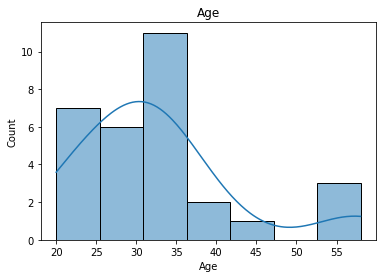

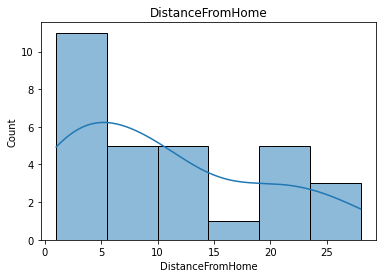

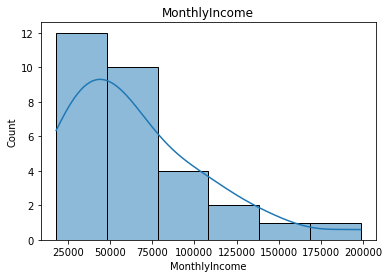

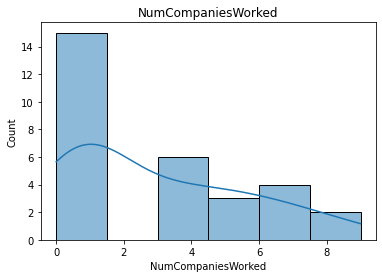

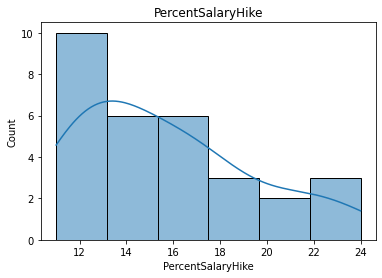

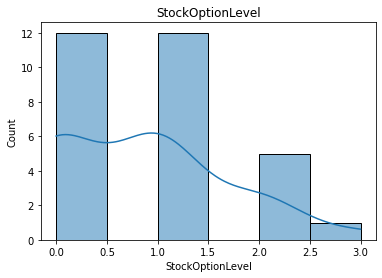

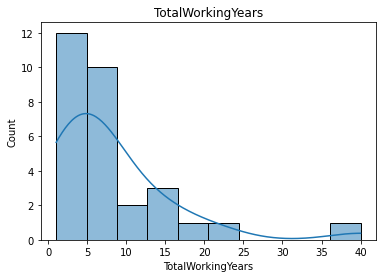

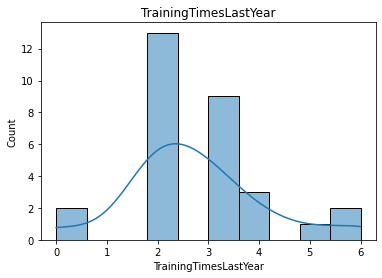

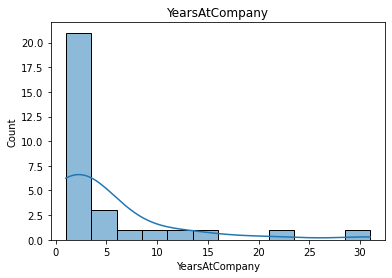

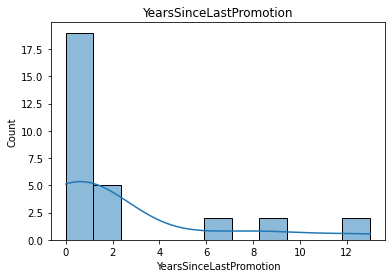

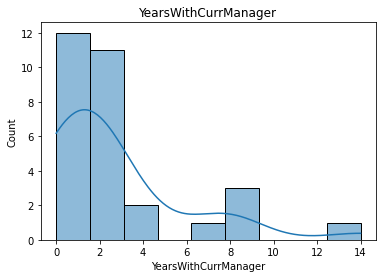

In [25]:
def distribution(num,data):
    for i in num:
        plt.title(i)
        sns.histplot(att_final[i],kde = True)
        plt.show()
distribution(numerical,att)

In [26]:
len(att[(att["MonthlyIncome"]>130000) & (att["MonthlyIncome"]<170000)])

13

In [27]:
len(non[(non["MonthlyIncome"]>130000) & (non["MonthlyIncome"]<170000)])

75

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

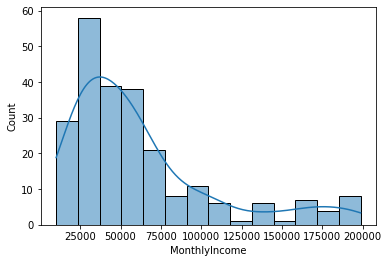

In [28]:
sns.histplot(att["MonthlyIncome"],kde=True)


In [29]:
import pylab
import scipy.stats as stop
std_normal = np.random.normal(loc= 0 , scale = 1, size = 1000)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

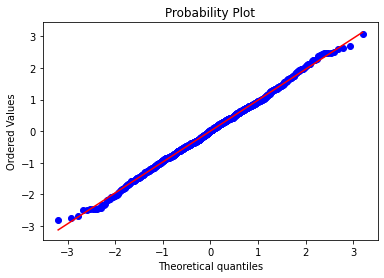

In [30]:
stop.probplot(std_normal,dist="norm",plot=pylab)

In [31]:
att_final["Age"].mean()

32.56666666666667

In [32]:
# # Now lets roll on to the hypothesis testing:
# h0 : the mean age of the attrition is 36
# ha : the mean age of the attrition is not 36  
# level of significance = 0.05
# degree of freedom = 29

In [33]:
calculatedvalue = (36-42) / ((data["Age"].std()) / (30 ** (1/2)))

In [34]:
calculatedvalue

-3.5973738226892644

In [35]:
data["Age"].std()
30 **(1/2)

5.477225575051661

In [36]:
# -2.045 to +2.045

In [37]:
# We got the calculated value is 3.28
# and the test value is -2.045
# # so the null hypothesis is rejected

In [38]:
data[data["Attrition"] == "Yes"]["Age"].mean()

33.607594936708864

In [39]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [40]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [41]:
# # Now lets roll on to the hypothesis testing:
# h0 : the mean age of the attrition > 67500
# ha : the mean age of the attrition is not >67500  
# level of significance = 0.05
# degree of freedom = 29

In [42]:
att["MonthlyIncome"].mean()

61682.61603375527

In [43]:
calculatedvalue = (61682-75000) / ((data["MonthlyIncome"].std()) / (30 ** (1/2)))
#1.699

In [44]:
calculatedvalue

-1.5494129102973053

In [45]:
### Now we go for Wilcoxon sign test

In [46]:
# Null hypothesis : there is no significance difference in the monthly income of the attrited data and non attrited data
# Alt hypothesis : there is  significance difference in the monthly income of the attrited data and non attrited data

In [47]:
from scipy.stats import mannwhitneyu
stats,p = mannwhitneyu(non["MonthlyIncome"],0.att["MonthlyIncome"])

SyntaxError: invalid syntax (<ipython-input-47-7defc2bde744>, line 2)

In [ ]:
print(stats,p)

In [ ]:
att["MonthlyIncome"].mean()

In [ ]:
non["MonthlyIncome"].mean()

In [ ]:
# therefore from the above inference we can say that the null hypothesis is accepted and hence proved using hypo


In [ ]:
# Null hypothesis : there is no significance corelation betwreen monthlyincome and age
# Alt hypothesis :  there is  significance corelation betwreen monthlyincome and age

In [ ]:
from scipy.stats import pearsonr

In [ ]:
stats,p = pearsonr(att["MonthlyIncome"],att["Age"])

In [ ]:
print(stats,p)

In [ ]:
plt.scatter(att["MonthlyIncome"],att["Age"])

In [ ]:
# From the above figure also we can see that there is no corelation between monthlyIncome and age
# In this way we can use pearsonr to find the correlation between differnt variables!

In [50]:
trial = pd.read_excel("Book1.xlsx",sheet_name = 0)

In [51]:
trial

,Respondent Number,Attitude,Duration
0,1,6,10
1,2,9,12
2,3,8,12
3,4,3,4
4,5,10,12
5,6,4,6
6,7,5,8
7,8,2,2
8,9,11,18
9,10,9,9


In [52]:
# Null hypo : there is no correlation between attitude and duration of the respondent
# alt hypo :  there is correlation between attitude and duration of the respondent


In [53]:
from scipy.stats import pearsonr
stats,p = pearsonr(trial["Attitude"],trial["Duration"])

In [54]:
print(stats,p)

0.9360778239640097 7.545161167077795e-06


In [55]:
# Since p value < 0.05 we can say that we reject the null hypothesis and accept the alternative hyp

In [56]:
trial1 = pd.read_excel("Book1.xlsx",sheet_name =1)

In [57]:
trial1

,Store Number,Sales,Promotion,Coupon,ClietelRatings
0,1,10,1,1,9
1,2,9,1,1,10
2,3,10,1,1,8
3,4,8,1,1,4
4,5,9,1,1,6
5,6,8,2,1,8
6,7,8,2,1,4
7,8,7,2,1,10
8,9,9,2,1,6
9,10,6,2,1,9


In [75]:
# Anova and ancove concept
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols("Sales ~ C(Promotion)+C(Coupon)",trial1).fit()
anova = sm.stats.anova_lm(model,typ =2)



In [76]:
anova

,sum_sq,df,F,PR(>F)
C(Promotion),106.066667,2.0,52.098237,8.032739e-10
C(Coupon),53.333333,1.0,52.392947,1.095036e-07
Residual,26.466667,26.0,NaN,NaN


In [79]:
# Anova and ancove concept
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols("Sales ~ C(Promotion)+C(Coupon)+ClietelRatings",trial1).fit()
anova = sm.stats.anova_lm(model,typ =2)



In [80]:
anova

,sum_sq,df,F,PR(>F)
C(Promotion),106.066667,2.0,51.732296,1.301539e-09
C(Coupon),53.333333,1.0,52.024936,1.471502e-07
ClietelRatings,0.837931,1.0,0.817375,3.745789e-01
Residual,25.628736,25.0,NaN,NaN


In [94]:
# Creating function for eta2
def eta(oneway):
    oneway["eta2"] = oneway[:-1]["sum_sq"]/sum(oneway["sum_sq"])
    column = ["sum_sq","df","F","PR(>F)","eta2"]
    oneway = oneway[column]
    return oneway
    

In [95]:
eta(anova)

,sum_sq,df,F,PR(>F),eta2
C(Promotion),106.066667,2.0,51.732296,1.301539e-09,0.570660
C(Coupon),53.333333,1.0,52.024936,1.471502e-07,0.286944
ClietelRatings,0.837931,1.0,0.817375,3.745789e-01,0.004508
Residual,25.628736,25.0,NaN,NaN,NaN


In [105]:
trial3 = pd.read_excel("Book1.xlsx",sheet_name=2)

In [106]:
trial3.dropna(inplace=True)

In [107]:
trial3

,ids,Gender,Smoking
0,43783,Female,NonSmoker
1,20278,Female,NonSmoker
2,20389,Female,NonSmoker
4,24559,Male,CurrentSmoker
5,28980,Female,NonSmoker
...,...,...,...
430,34021,Male,NonSmoker
431,40697,Female,NonSmoker
432,34272,Female,NonSmoker
433,33628,Male,CurrentSmoker


In [108]:
# Chi Square Test to check the dependanacy of the variable 


In [111]:
from scipy.stats import chi2_contingency

In [115]:
crosstab = pd.crosstab(trial3["Gender"],trial3["Smoking"])

In [116]:
crosstab

Smoking,CurrentSmoker,NonSmoker,PastSmoker
Gender,,,
Female,31,149,13
Male,37,148,24


In [117]:
stats,p,df,eof = chi2_contingency(crosstab)

In [118]:
print(stats,p,df,eof)

3.1712567666931584 0.20481904779163013 2 [[ 32.64676617 142.58955224  17.76368159]
 [ 35.35323383 154.41044776  19.23631841]]


In [119]:
# since p value is less than 0.05 there is no dependancy between gender and smoking

In [122]:
trial4 = pd.read_excel("Book1.xlsx",sheet_name = 4)

In [131]:
trial4
athlete = trial4[trial4["Athlete"] ==1]
athlete["MileMinDur"] = int(athlete[athlete["MileMinDur"]])
nonathlete = trial4[trial4["Athlete"] == 0]

KeyError: "None of [Index([00:06:26, 00:07:25, 00:05:48, 00:05:40, 00:06:52, 00:06:38, 00:06:36,\n       00:06:18, 00:06:54, 00:06:11,\n       ...\n       00:07:08, 00:07:59, 00:08:57, 00:08:11, 00:07:20, 00:07:30, 00:05:36,\n       00:07:12, 00:08:27, 00:07:14],\n      dtype='object', length=166)] are in the [columns]"

In [128]:
athlete

,ids,Athlete,MileMinDur
3,24559,1,00:06:26
4,28980,1,00:07:25
5,33312,1,00:05:48
6,40274,1,00:05:40
7,40390,1,00:06:52
...,...,...,...
382,35269,1,00:07:30
384,39413,1,00:05:36
385,45256,1,00:07:12
390,33628,1,00:08:27


In [126]:
# 2 independent sample t test

In [127]:
from scipy.stats import ttest_ind

In [ ]:
stats,p = ttest_ind(athlete["MileMinDur"],nonathlete["MileMinDur"])

In [134]:
trial5 = pd.read_excel("Book1.xlsx",sheet_name = 5)

In [135]:
trial5

,Sales,Design,Store Size
0,11,1,1
1,17,1,2
2,16,1,3
3,14,1,4
4,15,1,5
5,12,2,1
6,10,2,2
7,15,2,3
8,19,2,4
9,11,2,5


In [136]:
#In this way we can use hypothesis to interpret the result for population using the diffrent samples!

In [137]:
# Lets try the cdf and pdf distribution

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

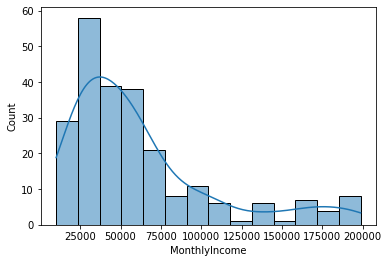

In [139]:
sns.histplot(att["MonthlyIncome"],kde=True)

In [160]:
hist,bins = np.histogram(att["MonthlyIncome"],bins =10 ,density =True)

In [161]:
hist

array([1.47735285e-05, 1.11920671e-05, 1.18635911e-05, 4.47682683e-06,
       3.35762012e-06, 1.34304805e-06, 1.34304805e-06, 1.11920671e-06,
       1.79073073e-06, 1.79073073e-06])

In [162]:
bins

array([ 10090.,  28940.,  47790.,  66640.,  85490., 104340., 123190.,
       142040., 160890., 179740., 198590.])

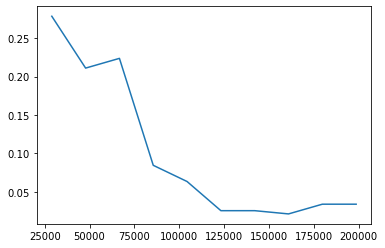

In [163]:
pdf = hist/sum(hist)
cdf = np.cumsum(hist)
plt.plot(bins[1:],pdf,label = " PDF")

In [165]:
np.percentile(att["MonthlyIncome"],np.arange(0,100,10))

array([ 10090.,  22898.,  26668.,  31776.,  41878.,  49080.,  55950.,
        65090.,  85950., 136126.])